## САМОСТОЯТЕЛЬНАЯ РАБОТА. АНСАМБЛИ. СТОХАСТИЧЕСКИЕ МОДЕЛИ

Дано: Имеется набор данных из системы поискового антиспама.

Требуется: 

* Построить классификатор для представленных данных на основе алгоритма Random Forest. 
* Провести сравнение данного метода с известными алгоритмами классификации. 
* Ответить на вопросы.


1. Скачать данные и запустить шаблон кода на python

```
$ python rf.py -h
$ python rf.py -tr spam.train.txt -te spam.test.txt
```

2. Сравнить RF c другими известными алгоритмами классификации.

3. Написать функцию, подбирающую параметры числа деревьев и процента признаков в деревьях. Построить график.

4. Ответить на вопрос: Почему качество классификации для класса spam выше, чем для класса notspam?

### Task 1

In [2]:
!python rf.py -tr spam.train.txt -te spam.test.txt

Figure(800x800)
             precision    recall  f1-score   support

        0.0    0.70225   0.87359   0.77861      2033
        1.0    0.96586   0.90614   0.93505      8023

avg / total    0.91256   0.89956   0.90342     10056
final score    0.83406   0.88987   0.85683     10056



### Task 2 

In [71]:
from rf import classification_report, visualize_data
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [72]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "AdaBoost"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=550, max_features=0.5),
    AdaBoostClassifier()]

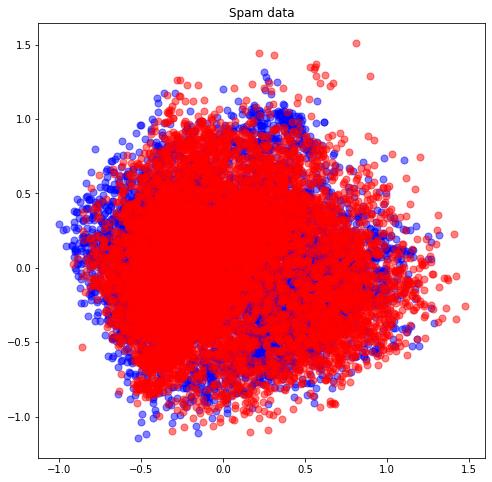

In [73]:
train_data = np.loadtxt("spam.train.txt")
test_data  = np.loadtxt("spam.test.txt")

total_data = np.concatenate(([train_data, test_data]), axis=0)

visualize_data(total_data[0::, 1::], len(train_data[:,0]), len(test_data[:,0]))

number_of_features = len(train_data[0, :])

In [74]:
n_folds = 3
scores = [[] for i in range(len(classifiers))]

kf = KFold(n_splits=n_folds)
X, y = train_data[0::, 1::], train_data[0::, 0]

for train_index, test_index in tqdm(kf.split(X), total=n_folds):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # iterate over classifiers
    for j, (name, clf) in enumerate(zip(names, classifiers)):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = f1_score(y_test, y_pred)
        scores[j].append(score)





  0%|          | 0/3 [00:00<?, ?it/s]



 33%|███▎      | 1/3 [00:23<00:47, 23.78s/it]



 67%|██████▋   | 2/3 [00:46<00:23, 23.46s/it]



100%|██████████| 3/3 [01:08<00:00, 22.76s/it]


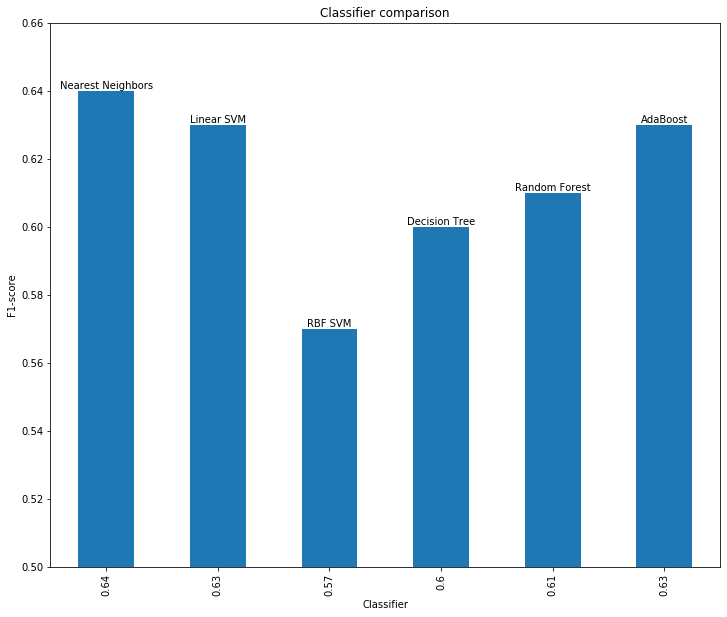

In [75]:
import pandas as pd
import math 

def print_scores(scores, names, y_min, y_max):
    scores = [round(np.mean(score), 2) for score in scores]
    scores_series = pd.Series(scores)
    # Plot the figure.
    plt.figure(figsize=(12, 10))
    ax = scores_series.plot(kind='bar', ylim=(y_min, y_max))
    ax.set_title('Classifier comparison')
    ax.set_xlabel('Classifier')
    ax.set_ylabel('F1-score')
    ax.set_xticklabels(scores)

    rects = ax.patches

    for rect, name in zip(rects, names):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height, name,
                ha='center', va='bottom')
print_scores(scores, names, 0.5, 0.66)

Nearest Neighbors
             precision    recall  f1-score   support

        0.0    0.78589   0.93704   0.85484      2033
        1.0    0.98323   0.93531   0.95867      8023

avg / total    0.94333   0.93566   0.93768     10056
final score    0.88456   0.93617   0.90675     10056

Linear SVM
             precision    recall  f1-score   support

        0.0    0.70454   0.95475   0.81078      2033
        1.0    0.98740   0.89854   0.94088      8023

avg / total    0.93021   0.90990   0.91457     10056
final score    0.84597   0.92664   0.87583     10056

RBF SVM
             precision    recall  f1-score   support

        0.0    0.54179   0.99164   0.70073      2033
        1.0    0.99732   0.78749   0.88007      8023

avg / total    0.90522   0.82876   0.84381     10056
final score    0.76955   0.88956   0.79040     10056

Decision Tree
             precision    recall  f1-score   support

        0.0    0.57999   0.85243   0.69030      2033
        1.0    0.95756   0.84357   0.8

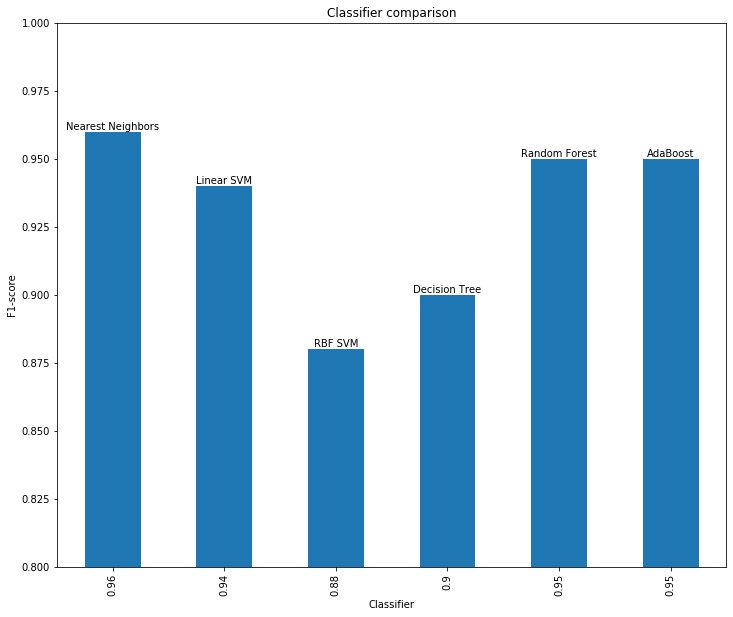

In [77]:
X_test, y_test = test_data[0::, 1::], test_data[0::, 0]
scores = [[] for i in range(len(classifiers))]

for j, (name, clf) in enumerate(zip(names, classifiers)):
        clf.fit(X, y)
        y_pred = clf.predict(X_test)
        score = f1_score(y_test, y_pred)
        scores[j].append(score)
        print(name)
        print(classification_report(y_test, y_pred))
        
print_scores(scores, names, 0.8, 1)

### Task 3

In [64]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
params = {
    'n_estimators': range(50, 551, 100),
    'max_features': np.linspace(0.5, 1.0, 5)
}

search = GridSearchCV(clf, param_grid=params, cv=3, n_jobs=-1)
search.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [65]:
search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=550,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Task 4

Качество классификации для класса spam выше, чем для класса notspam возможно от того, что классы несбалансированы - в обучающей выборке намного больше примеров спама. Так же есть предположение, что признаки в большей степени характеризуют спам, у спамовых писем (возможно) можно выделить больше общего, чем у неспамовых.